<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/GW%20PROJECT/PlottingParamatersFromFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Writing A Function That Given A File Path + Parameter, Extracts The Values Of Given Parameter In The File
def Get_Parameters(file_path, keyword):
    all_data = []
    with h5py.File(file_path, 'r') as f:
        def search(name):
            if name.endswith(f'/{keyword}') and isinstance(f[name], h5py.Dataset):
                all_data.append(f[name][()].flatten())
        f.visit(search)
    return np.concatenate(all_data)

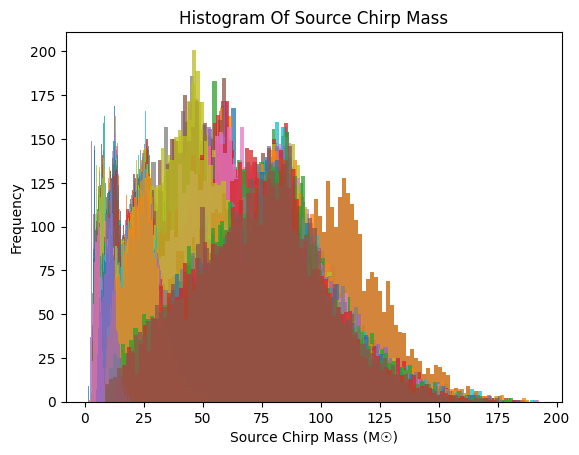

In [ ]:
# Plotting All The chirp_mass_source of events seperately
folder_path = 'AllEvents' # - Name Of Folder With ALl Event Files in
for file_name in os.listdir(folder_path):
    if file_name.endswith('.h5'):
        file_path = os.path.join(folder_path, file_name)
        f = h5py.File(file_path, 'r')
        chirp_mass_s = Get_Parameters(file_path, 'chirp_mass_source')
        plt.hist(chirp_mass_s, bins=100, alpha=0.75)
        f.close()
plt.xlabel('Source Chirp Mass (M☉)')
plt.ylabel('Frequency')
plt.title('Histogram Of Source Chirp Mass')

Text(0.5, 1.0, 'Histogram of Chirp Mass from HDF5 Files')

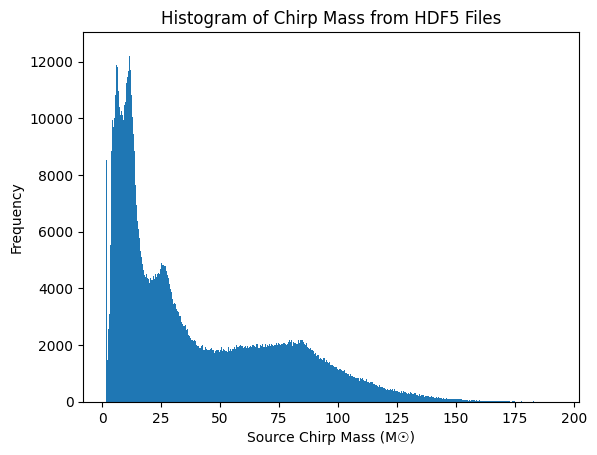

In [ ]:
# Now Plotting All The Chirp Masses Together
all_chirp_mass_s = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.endswith('.h5'):
        f = h5py.File(file_path, 'r')
        chirp_mass_s = Get_Parameters(file_path, 'chirp_mass_source')
        all_chirp_mass_s.append(chirp_mass_s)
all_chirp_mass_s = np.concatenate(all_chirp_mass_s)

plt.hist(all_chirp_mass_s, bins=500)
plt.xlabel('Source Chirp Mass (M☉)')
plt.ylabel('Frequency')
plt.title('Histogram of Chirp Mass from HDF5 Files')

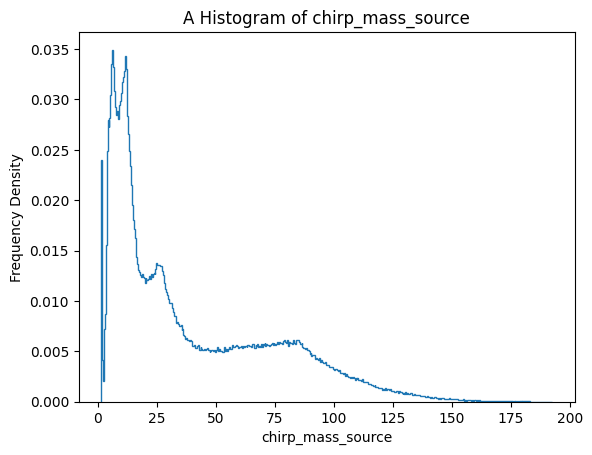

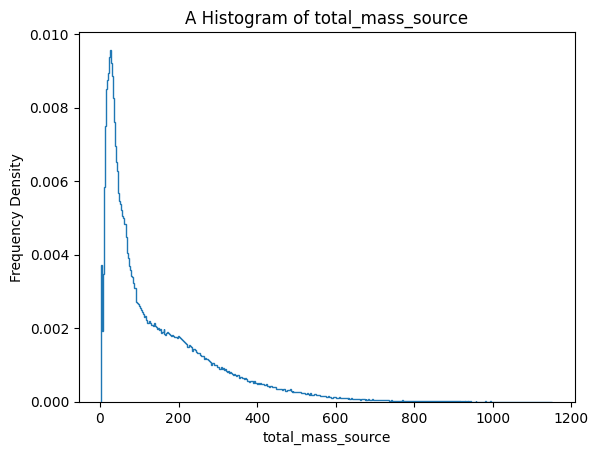

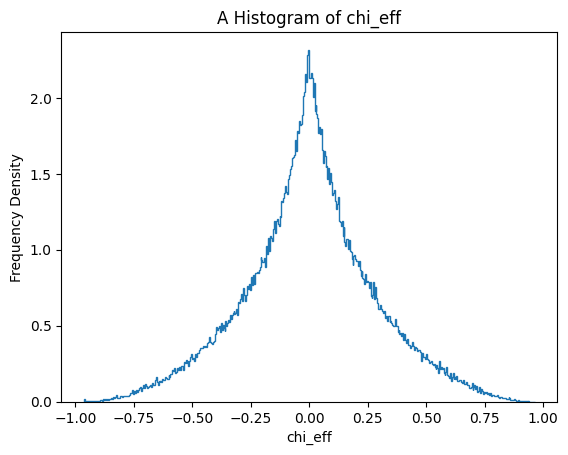

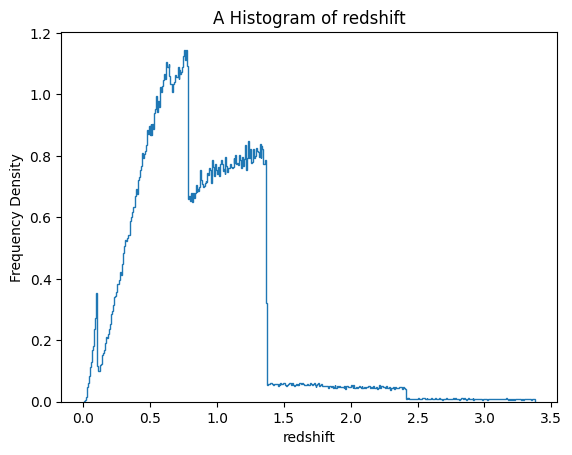

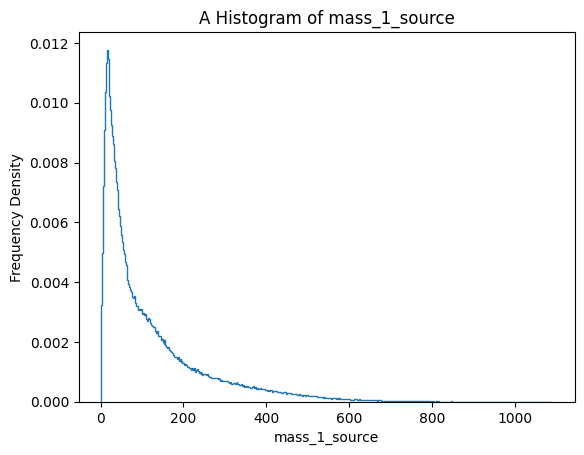

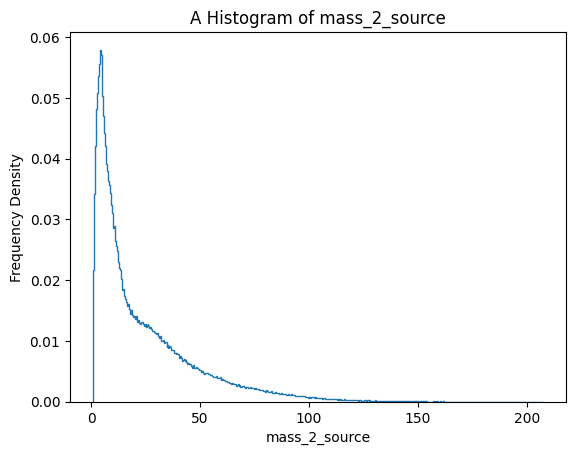

In [ ]:
folder_path = 'AllEvents' #Name Of File

# The Parameters We Want To Plot As They Appear In The File
value_names = ['chirp_mass_source','total_mass_source', 'chi_eff','redshift','mass_1_source','mass_2_source']
all_values = {}
for name in value_names:
    all_values[name] = []

# Looping Through All The Files In The Folder, Storing All The Values Of Paramater In The Dictionary
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.endswith('.h5'):
        f = h5py.File(file_path, 'r')
        for name in value_names:
            value = Get_Parameters(file_path,name)
            all_values[name].append(value)

# Joining All The Value Arrays To Eachother And Plotting Them
for name in value_names:
    all_values[name] = np.concatenate(all_values[name])
    plt.figure()
    plt.hist(all_values[name], bins=500, density=True, histtype='step')
    plt.xlabel(name)
    plt.ylabel('Frequency Density')
    plt.title(f'A Histogram of {name}')